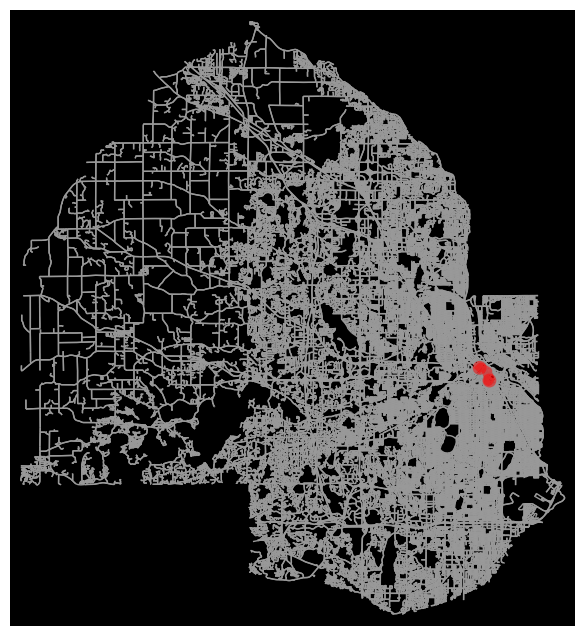

In [2]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import BallTree

# Load the accident data
file_path = 'lat_long.csv'
df = pd.read_csv(file_path)

# Data cleaning: Remove rows with non-numeric values in 'XCOORD' and 'YCOORD'
df = df[pd.to_numeric(df['XCOORD'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['YCOORD'], errors='coerce').notnull()]

# Ensure the coordinates are floats
df['XCOORD'] = df['XCOORD'].astype(float)
df['YCOORD'] = df['YCOORD'].astype(float)

# Define the area of interest (e.g., a specific city or bounding box)
place_name = 'Hennepin County, Minnesota, USA'  # Example area

# Get the street network for the specified area
G = ox.graph_from_place(place_name, network_type='drive')

# Create a spatial index for the graph nodes
nodes, edges = ox.graph_to_gdfs(G)
node_coords = np.array(list(zip(nodes['y'], nodes['x'])))
tree = BallTree(np.deg2rad(node_coords), metric='haversine')

# Add accident weights to the graph
def add_accident_weights(G, accidents):
    accident_coords = np.deg2rad(accidents[['XCOORD', 'YCOORD']])
    distances, indices = tree.query(accident_coords, k=1)
    nearest_nodes = nodes.index[indices.flatten()]
    
    # Update weights only once for each node
    for nearest_node in nearest_nodes:
        for u, v, key, data in G.edges(nearest_node, keys=True, data=True):
            data['weight'] = data.get('length', 1) * (1 + np.random.rand())  # Random weight for demonstration
    return G

# Add weights to the graph based on the accident data
G = add_accident_weights(G, df)

# Define a heuristic function for A*
def heuristic(n1, n2):
    return ox.distance.great_circle(G.nodes[n1]['y'], G.nodes[n1]['x'], G.nodes[n2]['y'], G.nodes[n2]['x'])

# Set origin and destination coordinates
origin_lat, origin_lon = 44.97, -93.26  # Example coordinates
destination_lat, destination_lon = 44.98, -93.27  # Example coordinates

# Find the nearest nodes in the graph to the origin and destination points
origin_node = ox.distance.nearest_nodes(G, origin_lon, origin_lat)
destination_node = ox.distance.nearest_nodes(G, destination_lon, destination_lat)

# Find the route using the A* algorithm
route = nx.astar_path(G, origin_node, destination_node, heuristic=heuristic, weight='weight')

# Visualize the route
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')

# Save the plot if needed
fig.savefig('route.png')


In [3]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import BallTree
import folium

# Load the accident data
file_path = 'lat_long.csv'
df = pd.read_csv(file_path)

# Data cleaning: Remove rows with non-numeric values in 'XCOORD' and 'YCOORD'
df = df[pd.to_numeric(df['XCOORD'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['YCOORD'], errors='coerce').notnull()]

# Ensure the coordinates are floats
df['XCOORD'] = df['XCOORD'].astype(float)
df['YCOORD'] = df['YCOORD'].astype(float)

# Define the area of interest (e.g., a specific city or bounding box)
place_name = 'Hennepin County, Minnesota, USA'  # Example area

# Get the street network for the specified area
G = ox.graph_from_place(place_name, network_type='drive')

# Create a spatial index for the graph nodes
nodes, edges = ox.graph_to_gdfs(G)
node_coords = np.array(list(zip(nodes['y'], nodes['x'])))
tree = BallTree(np.deg2rad(node_coords), metric='haversine')

# Add accident weights to the graph
def add_accident_weights(G, accidents):
    accident_coords = np.deg2rad(accidents[['XCOORD', 'YCOORD']])
    distances, indices = tree.query(accident_coords, k=1)
    nearest_nodes = nodes.index[indices.flatten()]
    
    # Update weights only once for each node
    for nearest_node in nearest_nodes:
        for u, v, key, data in G.edges(nearest_node, keys=True, data=True):
            data['weight'] = data.get('length', 1) * (1 + np.random.rand())  # Random weight for demonstration
    return G

# Add weights to the graph based on the accident data
G = add_accident_weights(G, df)

# Define a heuristic function for A*
def heuristic(n1, n2):
    return ox.distance.great_circle(G.nodes[n1]['y'], G.nodes[n1]['x'], G.nodes[n2]['y'], G.nodes[n2]['x'])

# Set origin and destination coordinates
origin_lat, origin_lon = 44.97, -93.26  # Example coordinates
destination_lat, destination_lon = 44.98, -93.27  # Example coordinates

# Find the nearest nodes in the graph to the origin and destination points
origin_node = ox.distance.nearest_nodes(G, origin_lon, origin_lat)
destination_node = ox.distance.nearest_nodes(G, destination_lon, destination_lat)

# Find the route using the A* algorithm
route = nx.astar_path(G, origin_node, destination_node, heuristic=heuristic, weight='weight')

# Create a map centered around the route
m = folium.Map(location=[(origin_lat + destination_lat) / 2, (origin_lon + destination_lon) / 2], zoom_start=13)

# Add the route to the map
route_nodes = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in route]
folium.PolyLine(route_nodes, color='blue', weight=5, opacity=0.7).add_to(m)

# Add accident locations to the map
for _, row in df.iterrows():
    folium.CircleMarker(location=(row['XCOORD'], row['YCOORD']), radius=3, color='red', fill=True).add_to(m)

# Save the map as an HTML file
m.save('route_map.html')


In [4]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import folium

# Load the accident data
file_path = 'lat_long.csv'
df = pd.read_csv(file_path)

# Data cleaning: Remove rows with non-numeric values in 'XCOORD' and 'YCOORD'
df = df[pd.to_numeric(df['XCOORD'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['YCOORD'], errors='coerce').notnull()]

# Ensure the coordinates are floats
df['XCOORD'] = df['XCOORD'].astype(float)
df['YCOORD'] = df['YCOORD'].astype(float)

# Define the area of interest (e.g., a specific city or bounding box)
place_name = 'Hennepin County, Minnesota, USA'  # Example area

# Get the street network for the specified area
G = ox.graph_from_place(place_name, network_type='drive')

# Create a spatial index for the graph nodes
nodes, edges = ox.graph_to_gdfs(G)
node_coords = np.array(list(zip(nodes['y'], nodes['x'])))
tree = BallTree(np.deg2rad(node_coords), metric='haversine')

# Define a function to calculate the potential field
def calculate_potential_field(G, origin, destination, accidents):
    potential = {}
    dest_x, dest_y = G.nodes[destination]['x'], G.nodes[destination]['y']
    
    for node in G.nodes:
        node_x, node_y = G.nodes[node]['x'], G.nodes[node]['y']
        attractive_potential = np.sqrt((node_x - dest_x)**2 + (node_y - dest_y)**2)
        repulsive_potential = 0
        
        for _, accident in accidents.iterrows():
            acc_x, acc_y = accident['YCOORD'], accident['XCOORD']
            distance = np.sqrt((node_x - acc_x)**2 + (node_y - acc_y)**2)
            repulsive_potential += 1 / (distance + 0.1)  # Add a small value to avoid division by zero
        
        potential[node] = attractive_potential + repulsive_potential
    
    return potential

# Function to find the path based on the potential field
def find_path_potential_field(G, origin, destination, potential):
    path = [origin]
    current_node = origin
    
    while current_node != destination:
        neighbors = list(G.neighbors(current_node))
        next_node = min(neighbors, key=lambda n: potential[n])
        path.append(next_node)
        current_node = next_node
    
    return path

# Set origin and destination coordinates
origin_lat, origin_lon = 44.97, -93.26  # Example coordinates
destination_lat, destination_lon = 44.98, -93.27  # Example coordinates

# Find the nearest nodes in the graph to the origin and destination points
origin_node = ox.distance.nearest_nodes(G, origin_lon, origin_lat)
destination_node = ox.distance.nearest_nodes(G, destination_lon, destination_lat)

# Calculate the potential field
potential = calculate_potential_field(G, origin_node, destination_node, df)

# Find the route using the potential field
route = find_path_potential_field(G, origin_node, destination_node, potential)

# Create a map centered around the route
m = folium.Map(location=[(origin_lat + destination_lat) / 2, (origin_lon + destination_lon) / 2], zoom_start=13
# Add the route to the map
route_nodes = [(G.nodes[n]['y'], G.nodes[n]['x']) for n in route]
folium.PolyLine(route_nodes, color='blue', weight=5, opacity=0.7).add_to(m)

# Add accident locations to the map
for _, row in df.iterrows():
    folium.CircleMarker(location=(row['XCOORD'], row['YCOORD']), radius=3, color='red', fill=True).add_to(m)

# Save the map as an HTML file
m.save('route_map_pf.html')
